In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout, BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
import cv2


In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the images to a range of 0 to 1
x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(BatchNormalization())

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(layers.Conv2D(64, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(layers.Conv2D(128, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(layers.Conv2D(256, (5, 5), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.4))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_30 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_30               │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 28, 28, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_31               │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_32               │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_19 (Dropout)                 │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 20, 20, 128)         │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_33               │ (None, 20, 20, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_34               │ (None, 18, 18, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 14, 14, 256)         │       1,638,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_35               │ (None, 14, 14, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 512)                 │      25,690,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_22 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,898,986 (106.43 MB)

 Trainable params: 27,897,450 (106.42 MB)

 Non-trainable params: 1,536 (6.00 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(x_train, y_train, epochs=15,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])


Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 70s 38ms/step - accuracy: 0.2654 - loss: 7.5381 - val_accuracy: 0.4488 - val_loss: 1.6664
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 31ms/step - accuracy: 0.4336 - loss: 1.6151 - val_accuracy: 0.4216 - val_loss: 1.6295
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.4840 - loss: 1.4874 - val_accuracy: 0.3772 - val_loss: 1.8961
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.5341 - loss: 1.3681 - val_accuracy: 0.5635 - val_loss: 1.3278
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.5808 - loss: 1.2367 - val_accuracy: 0.6393 - val_loss: 1.1170
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 32ms/step - accuracy: 0.6114 - loss: 1.1366 - val_accuracy: 0.6458 - val_loss: 1.0466
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.6422 - loss: 1.0609 - val_accuracy: 0.6774 - val_loss: 0.9652
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.6752 -

Test Accuracy: 0.7732
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


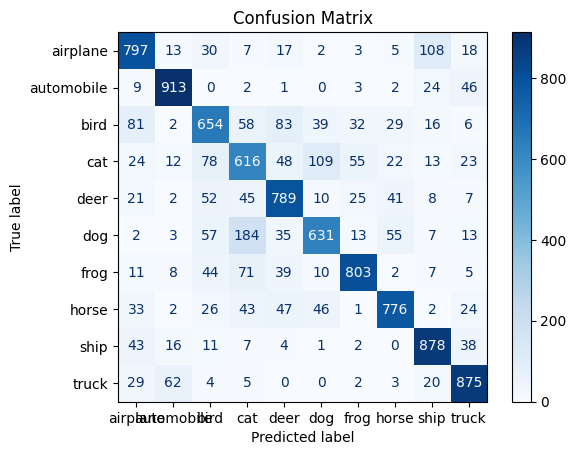

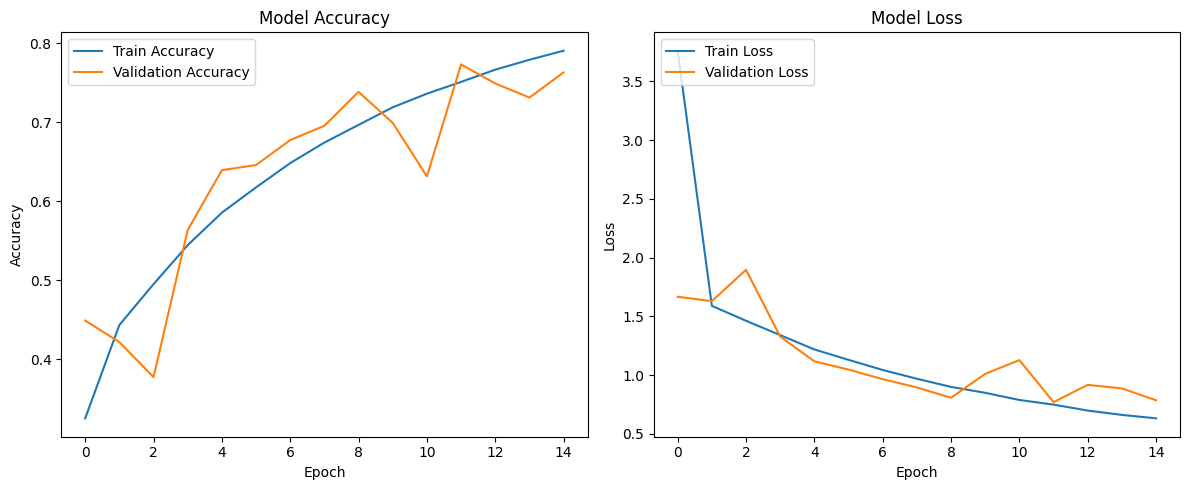

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy:.4f}')

# Predict the labels for the test set
y_pred = np.argmax(model.predict(x_test), axis=1)

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

NameError: name 'img_tensor' is not defined

In [ ]:
# Generate Class Activation Map (CAM)
def generate_cam(model, img_array, class_idx):
    # Use the last Conv2D layer explicitly by name
    last_conv_layer = model.get_layer('conv2d_35')

    # Call the model with a dummy input to define its output shape
    _ = model(tf.zeros(shape=img_array.shape))  # Added this line

    grad_model = Model(inputs=model.inputs, outputs=[last_conv_layer.output, model.output])

    # Forward pass through the model to ensure layer outputs are available
    _ = model(img_array)

    # Compute the gradient of the predicted class with regard to the output feature map of the last conv layer
    with tf.GradientTape() as tape:
        tape.watch(img_array)
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]
    grads = tape.gradient(loss, conv_outputs)

    # Compute the guided gradients
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Apply ReLU to the heatmap (only keep positive influence)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    return heatmap

In [ ]:
# Select a test image
img = x_test[0]
img_array = np.expand_dims(img, axis=0)

# Get the predicted class index
predicted_class = np.argmax(model.predict(img_array))

# Forward pass to set up the model for CAM generation
_ = model(img_array)

# Generate the CAM
heatmap = generate_cam(model, img_array, predicted_class)

# Resize the heatmap to match the original image size
heatmap = cv2.resize(heatmap.numpy(), (img.shape[1], img.shape[0]))

# Convert heatmap to RGB
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

# Overlay the heatmap on the original image
overlay_img = heatmap * 0.4 + img * 255

# Plot the original image and the CAM overlay
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.title('Class Activation Map (CAM)')
plt.imshow(overlay_img.astype('uint8'))
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


ValueError: The layer sequential_5 has never been called and thus has no defined output.